In [1]:
!pip3 install git+https://github.com/afqueiruga/torchdiffeq

  Cloning https://github.com/afqueiruga/torchdiffeq to /tmp/pip-req-build-t09_zzgn
  Running command git clone -q https://github.com/afqueiruga/torchdiffeq /tmp/pip-req-build-t09_zzgn
  Created wheel for torchdiffeq: filename=torchdiffeq-0.0.1-cp35-none-any.whl size=26380 sha256=c6e6fd78bba5b746db6aa6b3fd295ebf6c4320240b854d369cd29421b5f66d87
  Stored in directory: /tmp/pip-ephem-wheel-cache-wy6ch9sy/wheels/05/d9/19/4e1bf177954d538cf0be2a969780e3d9d605fd4dad04fcec39
Successfully built torchdiffeq


In [2]:
import torch
from matplotlib import pylab as plt
from odenet import datasets
from odenet.odenet_cifar10 import ODEResNet
from odenet import refine_train

import importlib
importlib.reload(refine_train)
from odenet.helper import set_seed, get_device, which_device
#importlib.reload(odenet_cifar10)

In [3]:
set_seed()
device = get_device()

Connected to a GPU


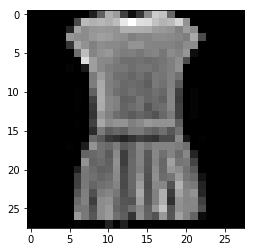

In [4]:
refset,trainset,trainloader,testset,testloader \
    = datasets.get_dataset('FMNIST',root='../data/')
plt.imshow(refset.data[3],cmap='gray')

In [13]:
def do_a_train_set(ALPHA,method, N_epochs, N_adapt, lr, lr_decay=0.1, epoch_update=[10], weight_decay=1e-5):
    model = ODEResNet(ALPHA=ALPHA,method=method,in_channels=1).to(device)
    res = refine_train.train_adapt(model, trainloader, testloader, torch.nn.CrossEntropyLoss(),
                N_epochs, N_adapt, lr=lr, lr_decay=lr_decay, epoch_update=epoch_update, weight_decay=weight_decay, 
                                   device=device)
    plt.semilogy(res[1])
    for r in res[2]:
        plt.axvline(r,color='k')
    return res

In [14]:
stash = {}

In [15]:
#for method in ['midpoint','rk4']:
for method in ['euler']:
    res = do_a_train_set(6, method, N_epochs=40, N_adapt=[], lr=0.02, 
                         lr_decay=0.2, epoch_update=[20,30], weight_decay=5e-4)
    stash[method] = res

RuntimeError: Given input size: (24x7x7). Calculated output size: (24x0x0). Output size is too small

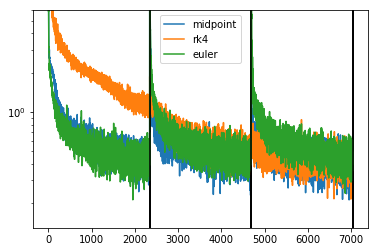

In [41]:
for k,(models,losses,refine_steps) in stash.items():
    plt.semilogy(losses,label=k)
    for r in refine_steps:
        plt.axvline(r,color='k')
plt.ylim(top=6)
plt.legend()
plt.show()

midpoint
0.84375


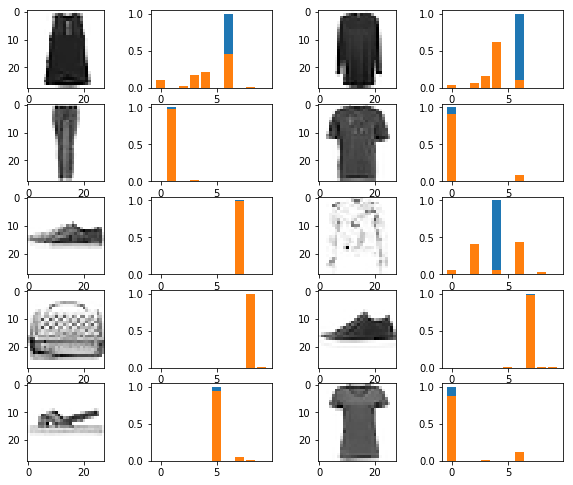

rk4
0.796875


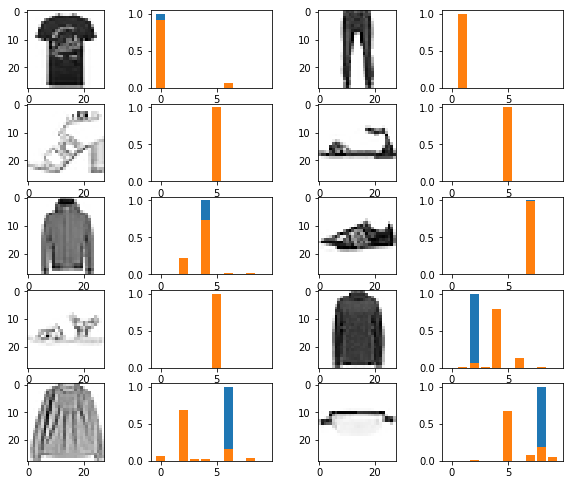

euler
0.8203125


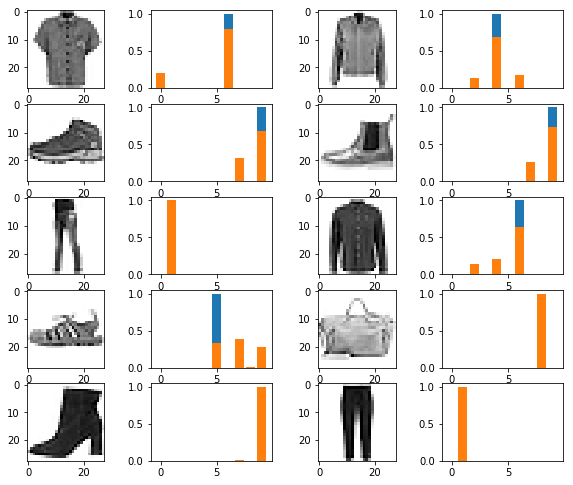

In [43]:
for k,(models,losses,refine_steps) in stash.items():
    print(k)
    refine_train.plot_accuracy(models[-1],testloader)